# Import libraries

In [1]:
import numpy as np
from tqdm import tqdm
import pandas as pd
import cv2
import os

from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D
from keras.utils import np_utils
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


# Read dataset

In [2]:
p = os.getcwd()
print(p)

os.chdir("..")
d = os.getcwd()
print(d)

dirname = os.path.dirname(d)
csvfile = os.path.join(d, 'datasets/celeba/labels.csv')
dirname = os.path.dirname(d)
imgfile = os.path.join(d, 'datasets/celeba/img/')


#Use Pandas to read csv file
dataset = pd.read_csv(csvfile, sep='\\t', engine='python')
dataset.head()

/Users/mel/Documents/MRes/Machine Learning/Assignment/AMLS_20-21_SN12345678/A1
/Users/mel/Documents/MRes/Machine Learning/Assignment/AMLS_20-21_SN12345678


,img_name,gender,smiling
0,0.jpg,-1,1
1,1.jpg,-1,1
2,2.jpg,1,-1
3,3.jpg,-1,-1
4,4.jpg,-1,-1


# Preprocess data

In [3]:
#Image size is loaded as 50% initial size
dataset_image = []
for i in tqdm(range(dataset.shape[0])):
    img = image.load_img(imgfile+dataset['img_name'][i], target_size=(109,89))
    img = img.convert('L')
    img = image.img_to_array(img)
    img = img/255

    dataset_image.append(img)

100%|██████████| 5000/5000 [00:33<00:00, 148.24it/s]


In [4]:
# Label x and y data
x = np.array(dataset_image)
y = np.array(dataset['gender']+1)/2

In [5]:
# Split the data into training and testing(75% training and 25% testing data)
x_train, x_test, y_train, y_test = train_test_split(x, y,shuffle=False,random_state=0)

In [6]:
x.shape

(5000, 109, 89, 1)

In [7]:
#Change data type to 'float32'
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Optimise batch size

In [8]:
#Evaluate batch size 128

# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(109,89,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
# output layer
model.add(Dense(1, activation='sigmoid'))

# compiling the sequential model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# training the model for 10 epochs
model.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/50
30/30 [==============================] - 42s 1s/step - loss: 0.6218 - accuracy: 0.6757 - val_loss: 3.2613 - val_accuracy: 0.2632
Epoch 2/50
30/30 [==============================] - 40s 1s/step - loss: 0.4588 - accuracy: 0.7941 - val_loss: 0.3691 - val_accuracy: 0.8168
Epoch 3/50
30/30 [==============================] - 40s 1s/step - loss: 0.2151 - accuracy: 0.9163 - val_loss: 0.3735 - val_accuracy: 0.7848
Epoch 4/50
30/30 [==============================] - 37s 1s/step - loss: 0.0885 - accuracy: 0.9749 - val_loss: 0.3671 - val_accuracy: 0.7896
Epoch 5/50
30/30 [==============================] - 41s 1s/step - loss: 0.0402 - accuracy: 0.9955 - val_loss: 0.3154 - val_accuracy: 0.9104
Epoch 6/50
30/30 [==============================] - 36s 1s/step - loss: 0.0209 - accuracy: 0.9997 - val_loss: 0.3068 - val_accuracy: 0.9168
Epoch 7/50
30/30 [==============================] - 35s 1s/step - loss: 0.0135 - accuracy: 0.9997 - val_loss: 0.2971 - val_accuracy: 0.9120
Epoch 8/50
30/30 [==

In [9]:
#Evaluate batch size 64

# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(109,89,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
# output layer
model.add(Dense(1, activation='sigmoid'))

# compiling the sequential model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# training the model for 10 epochs
model.fit(x_train, y_train, batch_size=64, epochs=50, validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/50
59/59 [==============================] - 42s 704ms/step - loss: 0.5054 - accuracy: 0.7523 - val_loss: 0.7707 - val_accuracy: 0.7536
Epoch 2/50
59/59 [==============================] - 40s 679ms/step - loss: 0.1704 - accuracy: 0.9325 - val_loss: 0.5568 - val_accuracy: 0.7096
Epoch 3/50
59/59 [==============================] - 38s 646ms/step - loss: 0.0512 - accuracy: 0.9835 - val_loss: 0.4568 - val_accuracy: 0.8224
Epoch 4/50
59/59 [==============================] - 39s 653ms/step - loss: 0.0193 - accuracy: 0.9981 - val_loss: 0.3487 - val_accuracy: 0.8368
Epoch 5/50
59/59 [==============================] - 39s 659ms/step - loss: 0.0123 - accuracy: 0.9989 - val_loss: 0.2286 - val_accuracy: 0.9136
Epoch 6/50
59/59 [==============================] - 39s 662ms/step - loss: 0.0045 - accuracy: 1.0000 - val_loss: 0.3346 - val_accuracy: 0.8936
Epoch 7/50
59/59 [==============================] - 44s 738ms/step - loss: 0.0036 - accuracy: 0.9995 - val_loss: 0.4559 - val_accuracy: 0.8344

In [8]:
#Evaluate batch size 256

# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(109,89,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))
# output layer
model.add(Dense(1, activation='sigmoid'))

# compiling the sequential model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

# training the model for 10 epochs
model.fit(x_train, y_train, batch_size=256, epochs=100, validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/100
15/15 [==============================] - 22s 1s/step - loss: 1.3140 - accuracy: 0.5352 - val_loss: 2.3454 - val_accuracy: 0.7448
Epoch 2/100
15/15 [==============================] - 22s 1s/step - loss: 0.8083 - accuracy: 0.5907 - val_loss: 0.5535 - val_accuracy: 0.7896
Epoch 3/100
15/15 [==============================] - 22s 1s/step - loss: 0.4890 - accuracy: 0.7653 - val_loss: 1.0262 - val_accuracy: 0.7504
Epoch 4/100
15/15 [==============================] - 23s 2s/step - loss: 0.2583 - accuracy: 0.9037 - val_loss: 1.3035 - val_accuracy: 0.7504
Epoch 5/100
15/15 [==============================] - 22s 1s/step - loss: 0.1338 - accuracy: 0.9600 - val_loss: 1.6952 - val_accuracy: 0.7504
Epoch 6/100
15/15 [==============================] - 22s 1s/step - loss: 0.0852 - accuracy: 0.9840 - val_loss: 1.3164 - val_accuracy: 0.7504
Epoch 7/100
15/15 [==============================] - 22s 1s/step - loss: 0.0478 - accuracy: 0.9965 - val_loss: 0.7651 - val_accuracy: 0.7504
Epoch 8/100
1

In [ ]:
#Batch size of 128 achieves the highest accuracy so is selected

# Optimise optimiser

In [9]:
#Evaluate 'SGD' optimiser

# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(109,89,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
# output layer
model.add(Dense(1, activation='sigmoid'))

# compiling the sequential model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='SGD')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# training the model for 10 epochs
model.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/100
30/30 [==============================] - 20s 660ms/step - loss: 0.6144 - accuracy: 0.7037 - val_loss: 0.6674 - val_accuracy: 0.5720
Epoch 2/100
30/30 [==============================] - 19s 649ms/step - loss: 0.4642 - accuracy: 0.7904 - val_loss: 0.8179 - val_accuracy: 0.3680
Epoch 3/100
30/30 [==============================] - 20s 655ms/step - loss: 0.4237 - accuracy: 0.8256 - val_loss: 0.5313 - val_accuracy: 0.7120
Epoch 4/100
30/30 [==============================] - 20s 658ms/step - loss: 0.3962 - accuracy: 0.8387 - val_loss: 0.5972 - val_accuracy: 0.6992
Epoch 5/100
30/30 [==============================] - 20s 655ms/step - loss: 0.3498 - accuracy: 0.8600 - val_loss: 0.6395 - val_accuracy: 0.5936
Epoch 6/100
30/30 [==============================] - 20s 680ms/step - loss: 0.3203 - accuracy: 0.8699 - val_loss: 0.4132 - val_accuracy: 0.8576
Epoch 7/100
30/30 [==============================] - 20s 652ms/step - loss: 0.2577 - accuracy: 0.9053 - val_loss: 0.4880 - val_accuracy:

In [10]:
#Evaluate 'RMSprop' optimiser

# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(109,89,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
# output layer
model.add(Dense(1, activation='sigmoid'))

# compiling the sequential model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='RMSprop')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# training the model for 10 epochs
model.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/100
30/30 [==============================] - 22s 740ms/step - loss: 0.5887 - accuracy: 0.6960 - val_loss: 0.6273 - val_accuracy: 0.6616
Epoch 2/100
30/30 [==============================] - 22s 732ms/step - loss: 0.3004 - accuracy: 0.8819 - val_loss: 0.7787 - val_accuracy: 0.4784
Epoch 3/100
30/30 [==============================] - 23s 769ms/step - loss: 0.1451 - accuracy: 0.9501 - val_loss: 0.4362 - val_accuracy: 0.7728
Epoch 4/100
30/30 [==============================] - 23s 761ms/step - loss: 0.0570 - accuracy: 0.9885 - val_loss: 0.2898 - val_accuracy: 0.8752
Epoch 5/100
30/30 [==============================] - 22s 741ms/step - loss: 0.0375 - accuracy: 0.9955 - val_loss: 0.7086 - val_accuracy: 0.5680
Epoch 6/100
30/30 [==============================] - 22s 750ms/step - loss: 0.0210 - accuracy: 0.9995 - val_loss: 1.5434 - val_accuracy: 0.3480
Epoch 7/100
30/30 [==============================] - 22s 745ms/step - loss: 0.0283 - accuracy: 0.9992 - val_loss: 1.2762 - val_accuracy:

# Investigate number of convolutional layers

In [11]:
# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(109,89,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(109,89,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
# output layer
model.add(Dense(1, activation='sigmoid'))

# compiling the sequential model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='SGD')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# training the model for 10 epochs
model.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/100
30/30 [==============================] - 58s 2s/step - loss: 0.5331 - accuracy: 0.7416 - val_loss: 0.6918 - val_accuracy: 0.3896
Epoch 2/100
30/30 [==============================] - 57s 2s/step - loss: 0.2873 - accuracy: 0.8979 - val_loss: 0.6552 - val_accuracy: 0.7648
Epoch 3/100
30/30 [==============================] - 57s 2s/step - loss: 0.2077 - accuracy: 0.9371 - val_loss: 0.6406 - val_accuracy: 0.7640
Epoch 4/100
30/30 [==============================] - 58s 2s/step - loss: 0.1635 - accuracy: 0.9544 - val_loss: 0.6229 - val_accuracy: 0.7808
Epoch 5/100
30/30 [==============================] - 58s 2s/step - loss: 0.1349 - accuracy: 0.9645 - val_loss: 0.6233 - val_accuracy: 0.7128
Epoch 6/100
30/30 [==============================] - 57s 2s/step - loss: 0.1147 - accuracy: 0.9752 - val_loss: 0.5617 - val_accuracy: 0.8560
Epoch 7/100
30/30 [==============================] - 57s 2s/step - loss: 0.0946 - accuracy: 0.9824 - val_loss: 0.5358 - val_accuracy: 0.8512
Epoch 8/100
3

In [12]:
# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(109,89,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(109,89,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(109,89,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
# output layer
model.add(Dense(1, activation='sigmoid'))

# compiling the sequential model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='SGD')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# training the model for 10 epochs
model.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/100
30/30 [==============================] - 95s 3s/step - loss: 0.6187 - accuracy: 0.7029 - val_loss: 0.6756 - val_accuracy: 0.7288
Epoch 2/100
30/30 [==============================] - 96s 3s/step - loss: 0.3225 - accuracy: 0.8752 - val_loss: 0.6694 - val_accuracy: 0.5536
Epoch 3/100
30/30 [==============================] - 94s 3s/step - loss: 0.2413 - accuracy: 0.9144 - val_loss: 0.6747 - val_accuracy: 0.4808
Epoch 4/100
30/30 [==============================] - 94s 3s/step - loss: 0.2020 - accuracy: 0.9333 - val_loss: 0.6201 - val_accuracy: 0.7272
Epoch 5/100
30/30 [==============================] - 94s 3s/step - loss: 0.1671 - accuracy: 0.9469 - val_loss: 0.5807 - val_accuracy: 0.8120
Epoch 6/100
30/30 [==============================] - 94s 3s/step - loss: 0.1430 - accuracy: 0.9595 - val_loss: 0.5667 - val_accuracy: 0.7880
Epoch 7/100
30/30 [==============================] - 94s 3s/step - loss: 0.1180 - accuracy: 0.9693 - val_loss: 0.5177 - val_accuracy: 0.8432
Epoch 8/100
3

#2 convolutional layers chosen

# Investigate number of hidden layers

In [13]:
# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(109,89,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(109,89,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
# hidden layer
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
# output layer
model.add(Dense(1, activation='sigmoid'))

# compiling the sequential model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='SGD')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# training the model for 10 epochs
model.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/100
30/30 [==============================] - 67s 2s/step - loss: 0.7077 - accuracy: 0.6184 - val_loss: 0.7508 - val_accuracy: 0.2752
Epoch 2/100
30/30 [==============================] - 59s 2s/step - loss: 0.5745 - accuracy: 0.6997 - val_loss: 0.7107 - val_accuracy: 0.3296
Epoch 3/100
30/30 [==============================] - 58s 2s/step - loss: 0.4526 - accuracy: 0.8069 - val_loss: 0.6480 - val_accuracy: 0.8456
Epoch 4/100
30/30 [==============================] - 57s 2s/step - loss: 0.3615 - accuracy: 0.8749 - val_loss: 0.6445 - val_accuracy: 0.7640
Epoch 5/100
30/30 [==============================] - 57s 2s/step - loss: 0.2996 - accuracy: 0.9080 - val_loss: 0.6337 - val_accuracy: 0.8320
Epoch 6/100
30/30 [==============================] - 57s 2s/step - loss: 0.2577 - accuracy: 0.9232 - val_loss: 0.5483 - val_accuracy: 0.8896
Epoch 7/100
30/30 [==============================] - 57s 2s/step - loss: 0.2211 - accuracy: 0.9373 - val_loss: 0.4989 - val_accuracy: 0.9120
Epoch 8/100
3

In [ ]:
#One hidden layer chosen

In [ ]:
#Optimiser SGD has the highest accuracy so is selected

# Accuracy on validation set

In [8]:
# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(109,89,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(109,89,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
# output layer
model.add(Dense(1, activation='sigmoid'))

# compiling the sequential model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='SGD')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# training the model for 10 epochs
history=model.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(x_test, y_test), callbacks=[es])

Epoch 1/100
30/30 [==============================] - 62s 2s/step - loss: 0.5758 - accuracy: 0.7189 - val_loss: 0.7244 - val_accuracy: 0.2592
Epoch 2/100
30/30 [==============================] - 59s 2s/step - loss: 0.3409 - accuracy: 0.8669 - val_loss: 0.6954 - val_accuracy: 0.3976
Epoch 3/100
30/30 [==============================] - 58s 2s/step - loss: 0.2455 - accuracy: 0.9171 - val_loss: 0.6408 - val_accuracy: 0.7424
Epoch 4/100
30/30 [==============================] - 58s 2s/step - loss: 0.1983 - accuracy: 0.9395 - val_loss: 0.6108 - val_accuracy: 0.8096
Epoch 5/100
30/30 [==============================] - 57s 2s/step - loss: 0.1653 - accuracy: 0.9536 - val_loss: 0.5676 - val_accuracy: 0.9024
Epoch 6/100
30/30 [==============================] - 58s 2s/step - loss: 0.1393 - accuracy: 0.9677 - val_loss: 0.5880 - val_accuracy: 0.7512
Epoch 7/100
30/30 [==============================] - 58s 2s/step - loss: 0.1187 - accuracy: 0.9736 - val_loss: 0.5646 - val_accuracy: 0.7768
Epoch 8/100
3

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


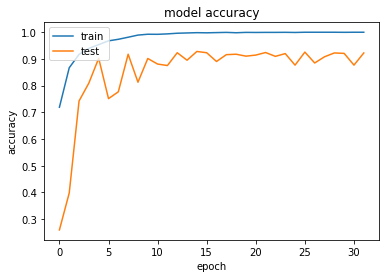

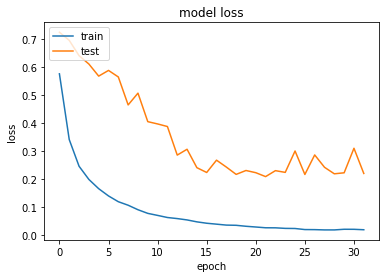

In [9]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Finding accuracy on test set with optimised CNN

In [11]:
#Use Pandas to read csv file
dirname = os.path.dirname(d)
csvtest = os.path.join(d, 'test/celeba_test/labels.csv')
dirname = os.path.dirname(d)
imgtest = os.path.join(d, 'test/celeba_test/img/')

test_dataset = pd.read_csv(csvtest, sep='\\t', engine='python')

,img_name,gender,smiling
0,0.jpg,-1,-1
1,1.jpg,-1,1
2,2.jpg,1,1
3,3.jpg,1,1
4,4.jpg,-1,-1


In [12]:
test_dataset_image = []
for i in tqdm(range(test_dataset.shape[0])):
    img = image.load_img(imgtest+test_dataset['img_name'][i], target_size=(109,89))
    img = img.convert('L')
    img = image.img_to_array(img)
    img = img/255

    test_dataset_image.append(img)

100%|██████████| 1000/1000 [00:02<00:00, 363.99it/s]


In [13]:
# Split the data
X_TEST = np.array(test_dataset_image)
Y_TEST = np.array(test_dataset['gender']+1)/2

In [14]:
# building a linear stack of layers with the sequential model
model = Sequential()
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(109,89,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# convolutional layer
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(109,89,1)))
model.add(MaxPool2D(pool_size=(1,1)))
# flatten output of conv
model.add(Flatten())
# hidden layer
model.add(Dense(100, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
# output layer
model.add(Dense(1, activation='sigmoid'))

# compiling the sequential model
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='SGD')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

# training the model for 10 epochs
history=model.fit(x_train, y_train, batch_size=128, epochs=100, validation_data=(X_TEST, Y_TEST), callbacks=[es])

Epoch 1/100
30/30 [==============================] - 60s 2s/step - loss: 0.6223 - accuracy: 0.6773 - val_loss: 0.6713 - val_accuracy: 0.5050
Epoch 2/100
30/30 [==============================] - 57s 2s/step - loss: 0.4508 - accuracy: 0.7923 - val_loss: 0.6363 - val_accuracy: 0.8370
Epoch 3/100
30/30 [==============================] - 58s 2s/step - loss: 0.2946 - accuracy: 0.8861 - val_loss: 0.6217 - val_accuracy: 0.6230
Epoch 4/100
30/30 [==============================] - 57s 2s/step - loss: 0.2264 - accuracy: 0.9269 - val_loss: 0.6421 - val_accuracy: 0.7040
Epoch 5/100
30/30 [==============================] - 57s 2s/step - loss: 0.1931 - accuracy: 0.9365 - val_loss: 0.5723 - val_accuracy: 0.9030
Epoch 6/100
30/30 [==============================] - 57s 2s/step - loss: 0.1581 - accuracy: 0.9549 - val_loss: 0.5139 - val_accuracy: 0.8590
Epoch 7/100
30/30 [==============================] - 57s 2s/step - loss: 0.1320 - accuracy: 0.9635 - val_loss: 0.4949 - val_accuracy: 0.8950
Epoch 8/100
3